<a href="https://colab.research.google.com/github/BelandyG/Project-2-Options/blob/main/Adult_Income_Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult income dataset

Name: Belandy Gard





An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. The goal is to predict if an individual's annual income excceds $50,000 based on census data.

Source of data:

https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download


# Data Dictionary:
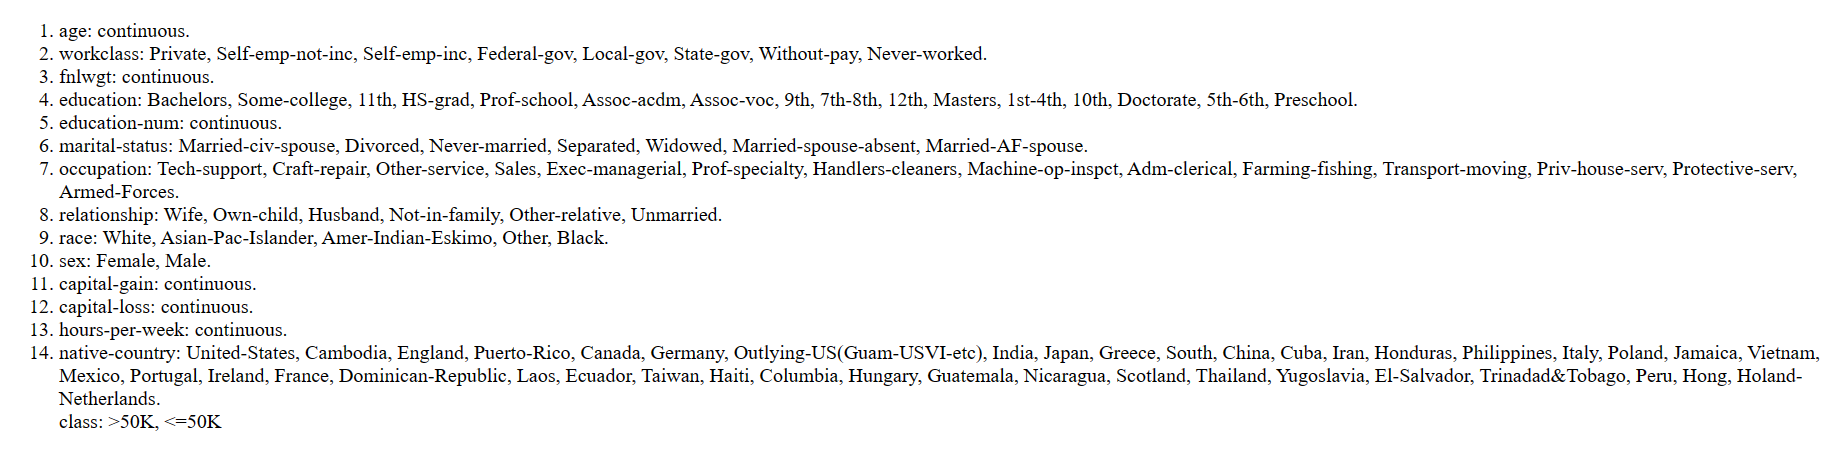

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = ('/content/Adult income.zip')
df = pd.read_csv(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [44]:
# shape
print(f"This dataset has {df.shape[0]} rows, each representing a reading of a \
Income Type. It has {df.shape[1]} columns, {df.shape[1]-1} feature columns \
(X) and 1 target column (y).")

This dataset has 48842 rows, each representing a reading of a Income Type. It has 15 columns, 14 feature columns (X) and 1 target column (y).


In [45]:
# check for and delete any duplicates
print(f"There are {df.duplicated().sum()} duplicated rows in this dataset.")
print("Deleting duplicates...")
df.drop_duplicates(inplace = True)
print(f"Now there are {df.duplicated().sum()} duplicated rows in this dataset.")

There are 52 duplicated rows in this dataset.
Deleting duplicates...
Now there are 0 duplicated rows in this dataset.


In [46]:
# I will drop column "fnlwgt" because its unique variable does not provide informational data
df = df.drop('fnlwgt', axis=1)

In [47]:
# I will Identify missing values.
sum_missing = df.isna().sum()
df.isna().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [48]:
# Find and fix any inconsistent categories of data
df.describe(include = 'object').round(2)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


In [49]:
#8)For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe(include = 'number').round(2)

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.00,48790.00,48790.00,48790.00,48790.00
mean,38.65,10.08,1080.22,87.60,40.43
std,13.71,2.57,7455.91,403.21,12.39
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,48.00,12.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,4356.00,99.00


In [50]:
#check for inconsistent values in Numeric columns
for col in list(df.select_dtypes(include='number')):
  print(col)
  print(df[col].value_counts())
  print()

age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

educational-num
9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: educational-num, dtype: int64

capital-gain
0        44755
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: capital-gain, Length: 123, dtype: int64

capital-loss
0       46508
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: capital-loss, Length: 99, dtype: int64

hours-per-week
40    22773
50     4242
45     2715
60     2177
35     1934
      ...  
69        1
87        1
94        1
82        1
79        1
Name: ho

# Univariate Visuals for the target and features

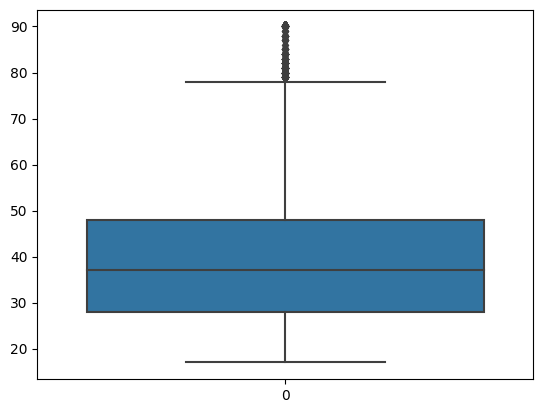

In [51]:
sns.boxplot(df['age']);

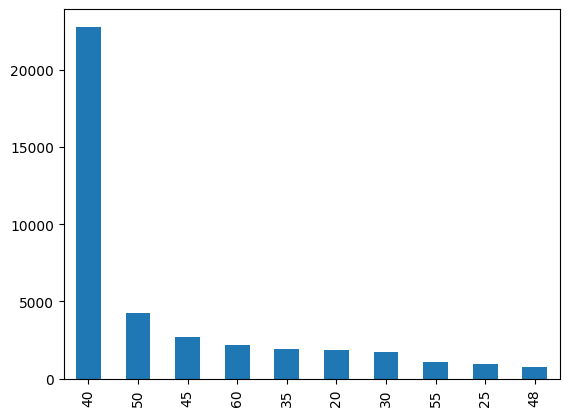

In [52]:
df['hours-per-week'].value_counts().head(10).plot.bar();

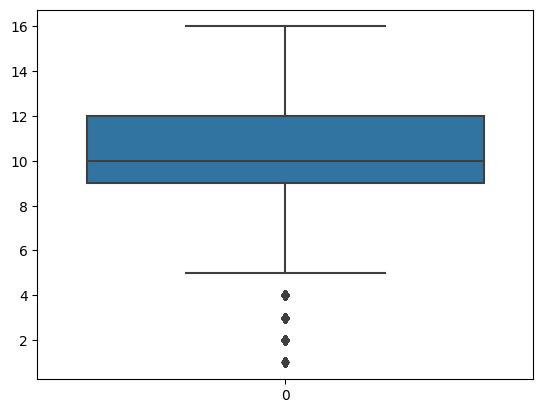

In [53]:
sns.boxplot(df['educational-num']);

In [54]:
# Remove "?" value from all columns
mask = (df != '?').all(1)
df = df.loc[mask]
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


#Multivariate Exploratory Visualizations

##Barplot

In [55]:
# Categorical variables will be further analyzed
# make list of all categorical columns
categorical_columns = list(df.select_dtypes(include = 'object'))

# check list
print(categorical_columns)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [56]:
df.drop(df[df['occupation'].isna()].index, inplace = True)

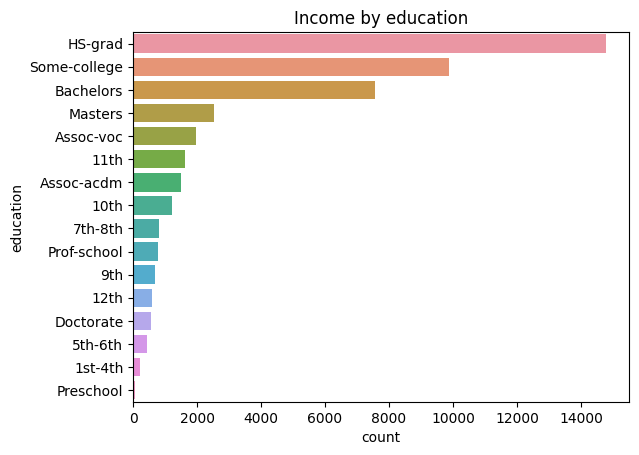

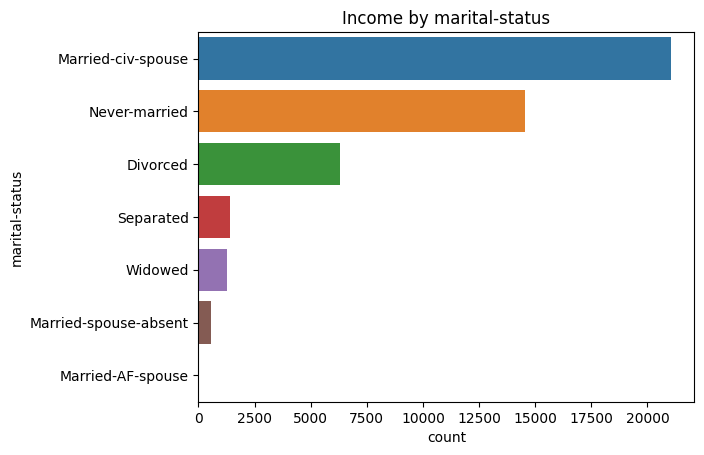

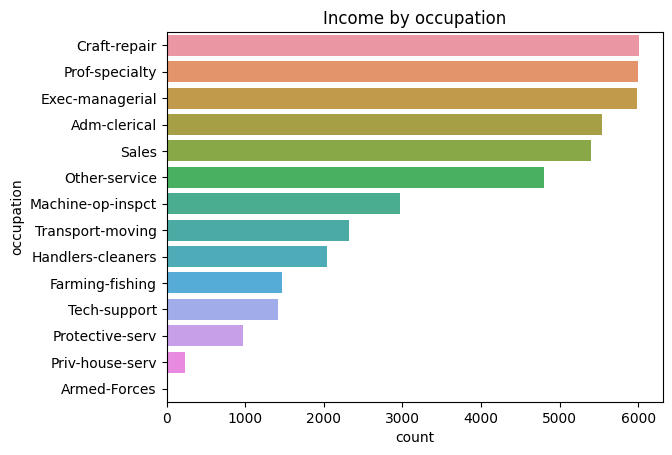

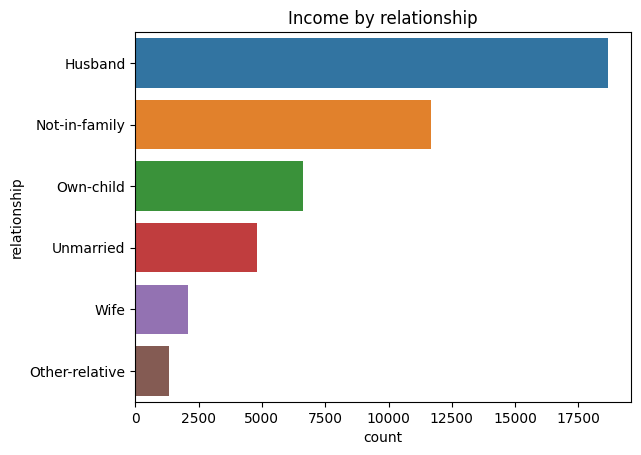

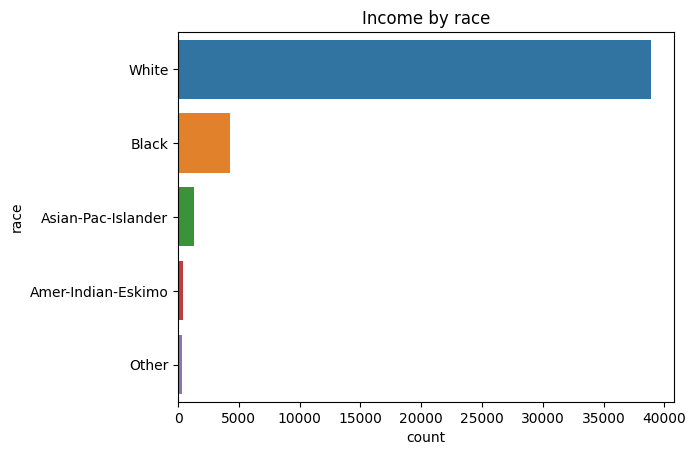

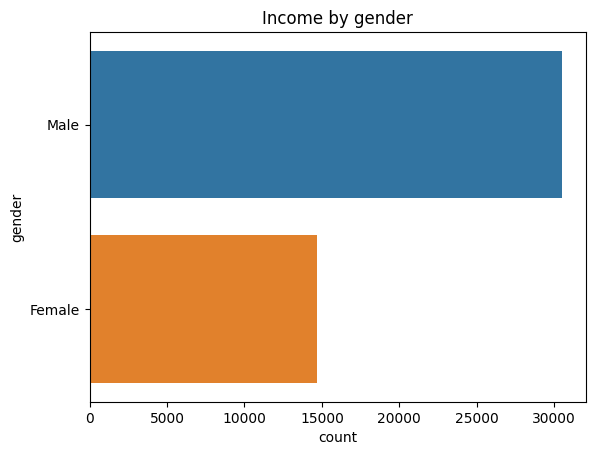

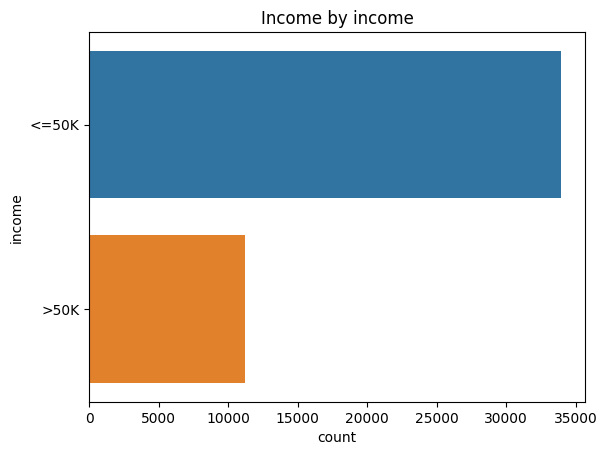

In [57]:
# Analyze barplots for categorical columns on income
# Remove native-country, which has too many unique values for the plots to be informational
categorical_columns.remove('native-country')
categorical_columns.remove('workclass')


# for each categorical column
for column in categorical_columns:

  # set variable for column name
  column_name = column

  # set the label order for bars
  label_order = df[column].value_counts().index

  # draw barplots with seaborn
  plot = sns.countplot(data = df,
                      y = column,
                      order = label_order)

  # set title
  plot.set_title('Income by ' + column_name)

  # show plot
  plt.show()

  # print blank lines for readability
  print('\n\n')

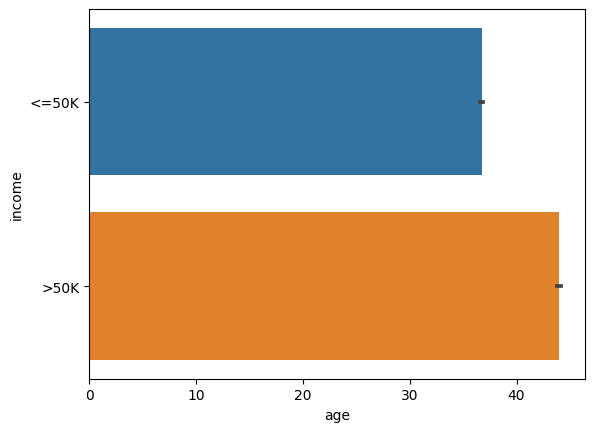

In [58]:
ax = sns.barplot(data=df, x="age", y='income')

##Heatmap

The following heatmap shows the corealation coefficient between each numeric variable. This is another was to visualize the information provided above.

In [59]:
import warnings
warnings.filterwarnings('ignore')

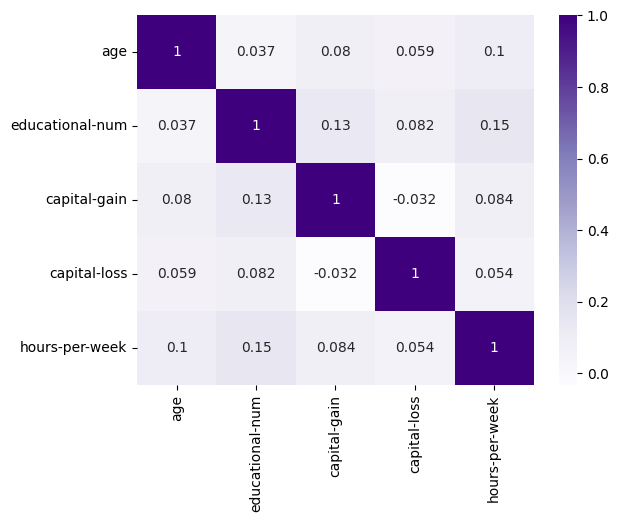

In [60]:
from pandas.io.formats.style_render import DataFrame
# explore correlation between numerical columns
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);


##Histogram

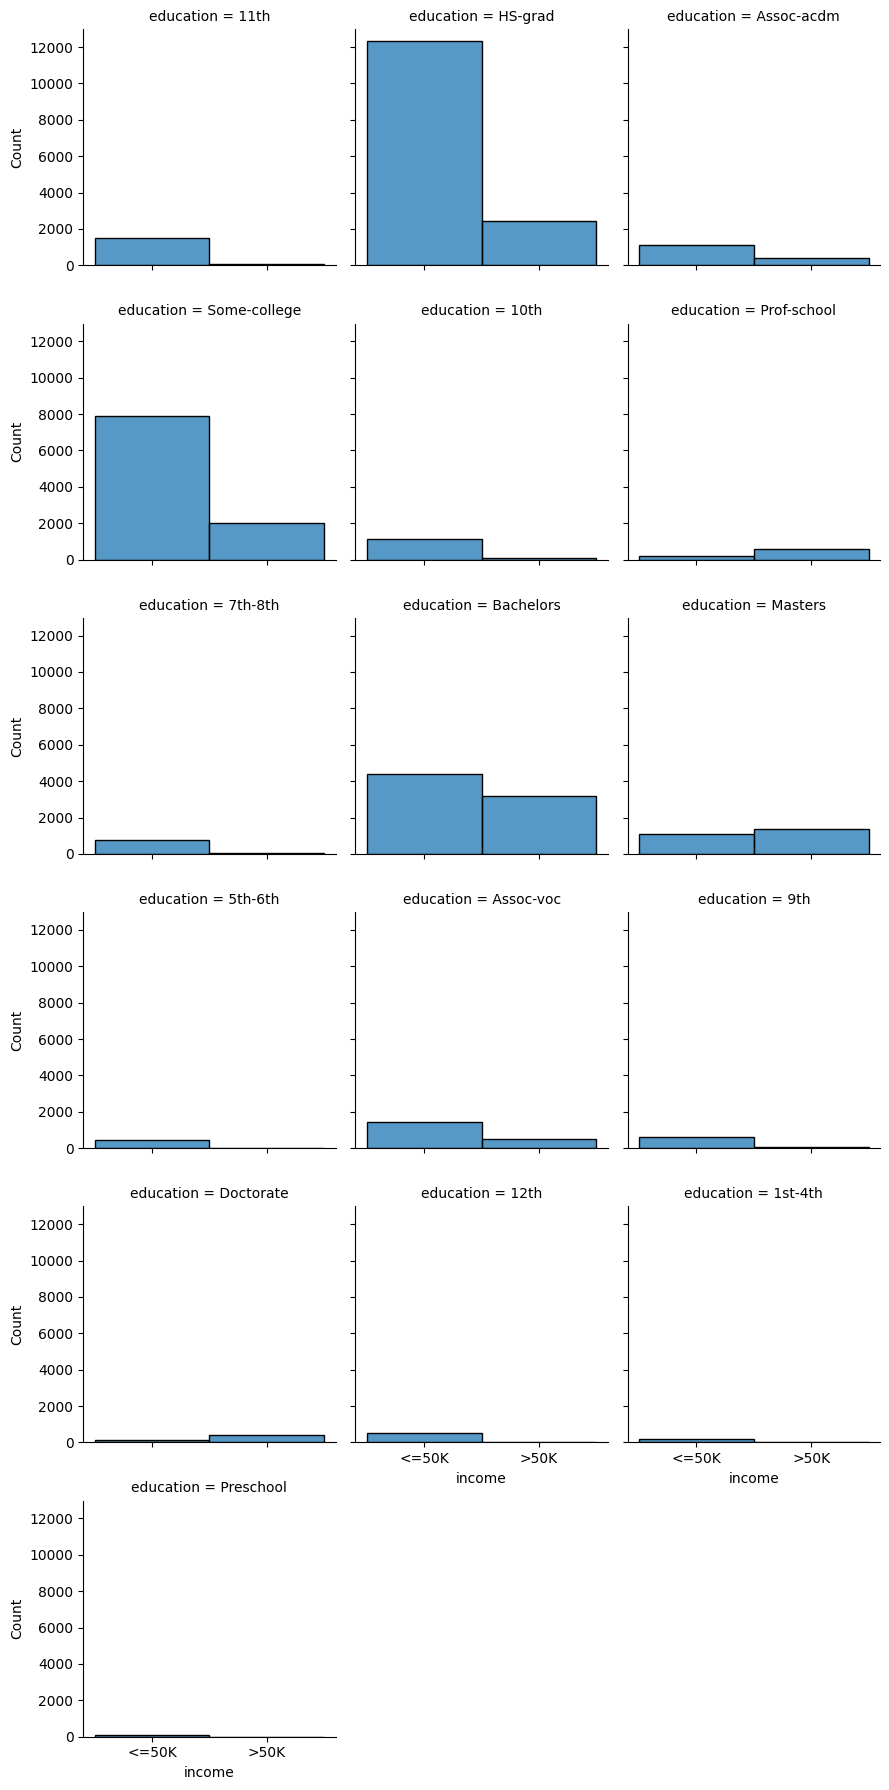

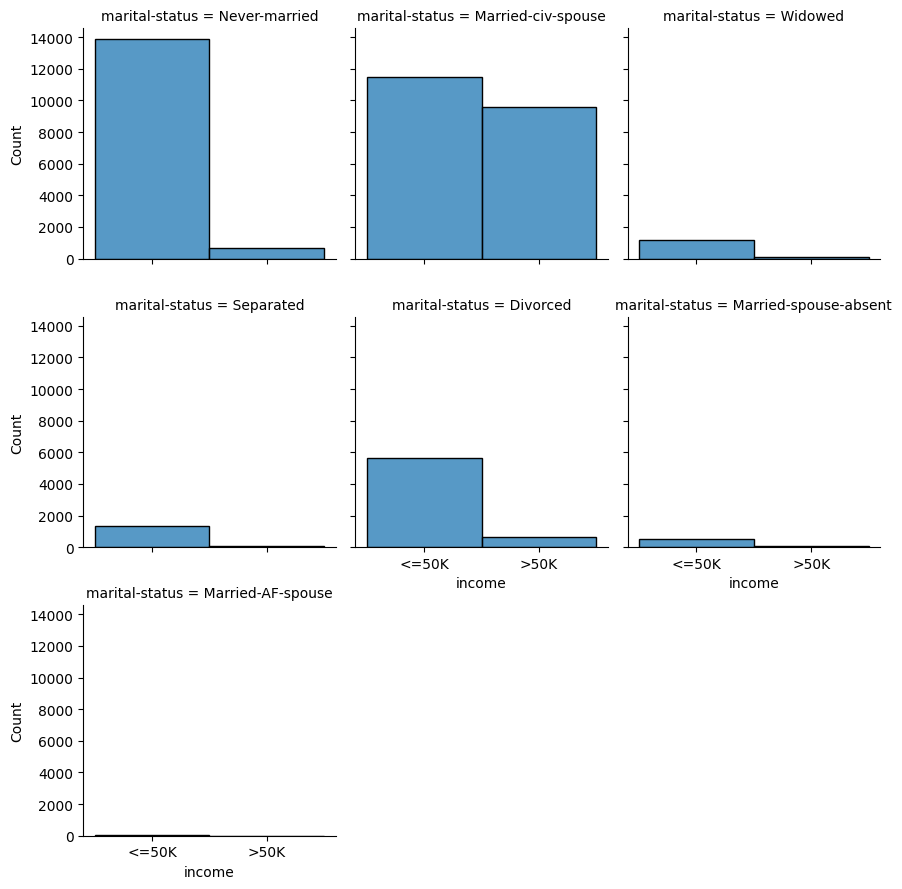

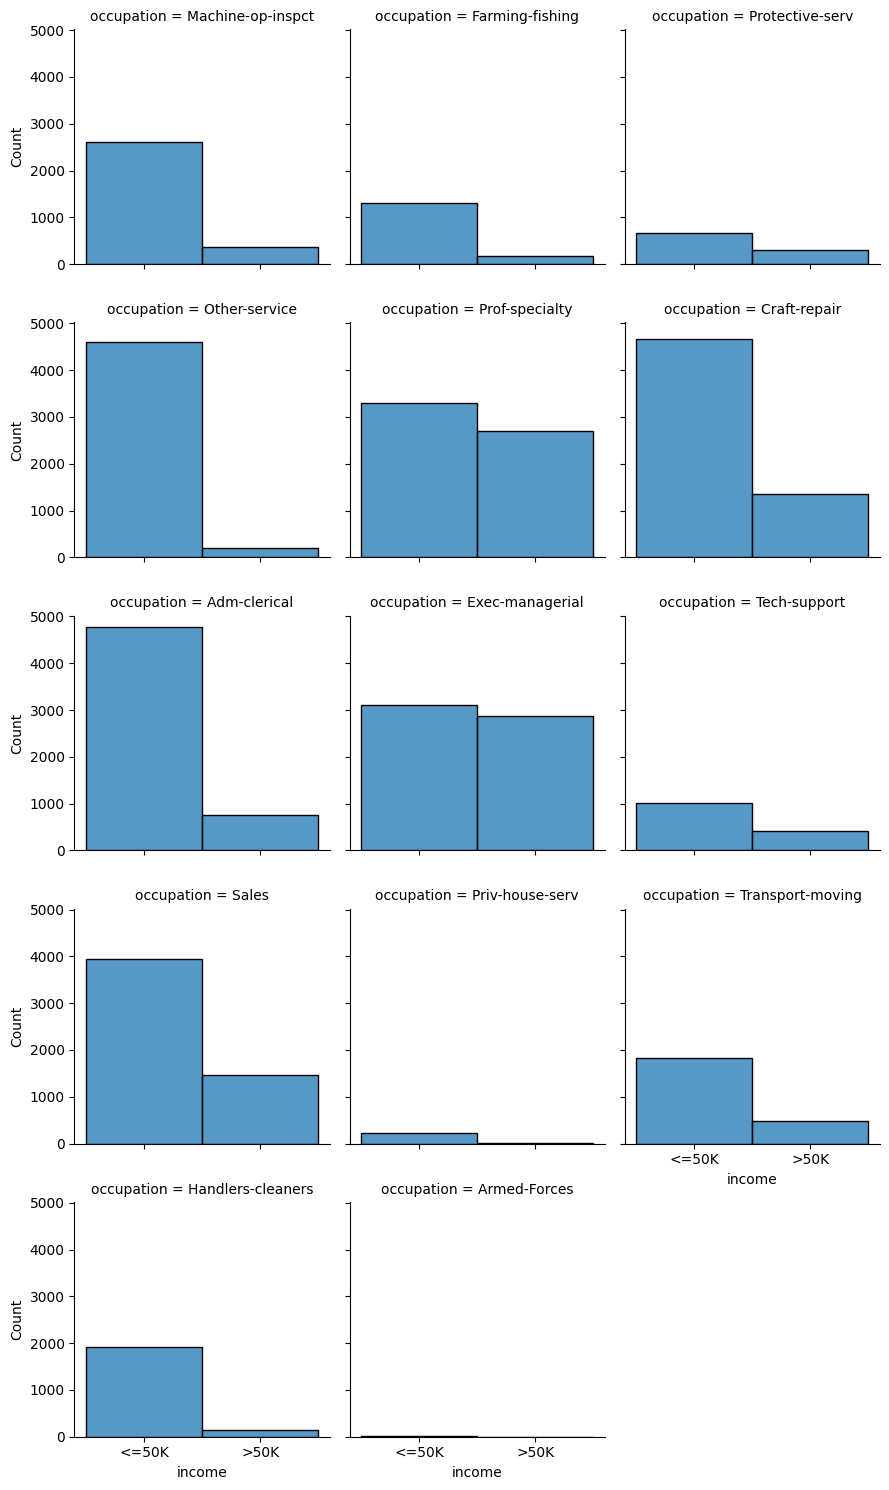

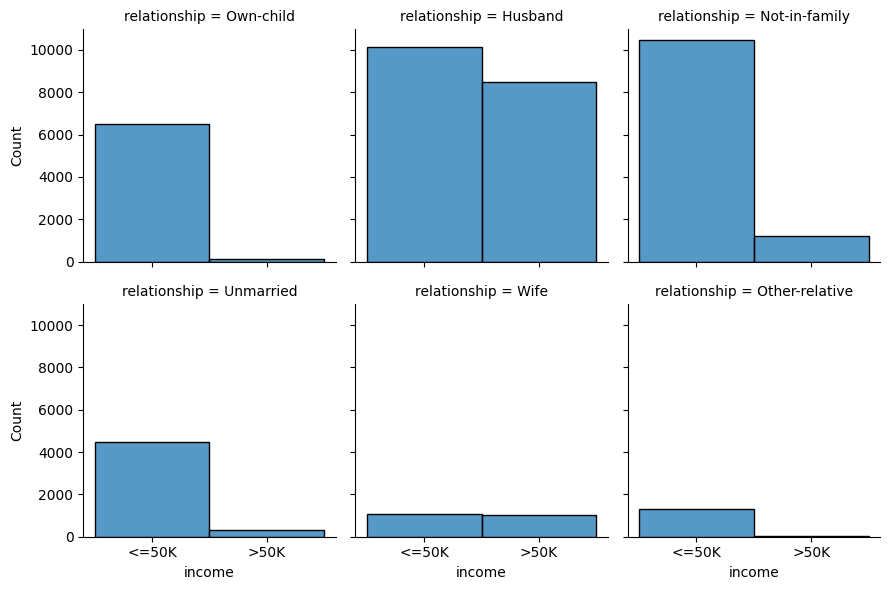

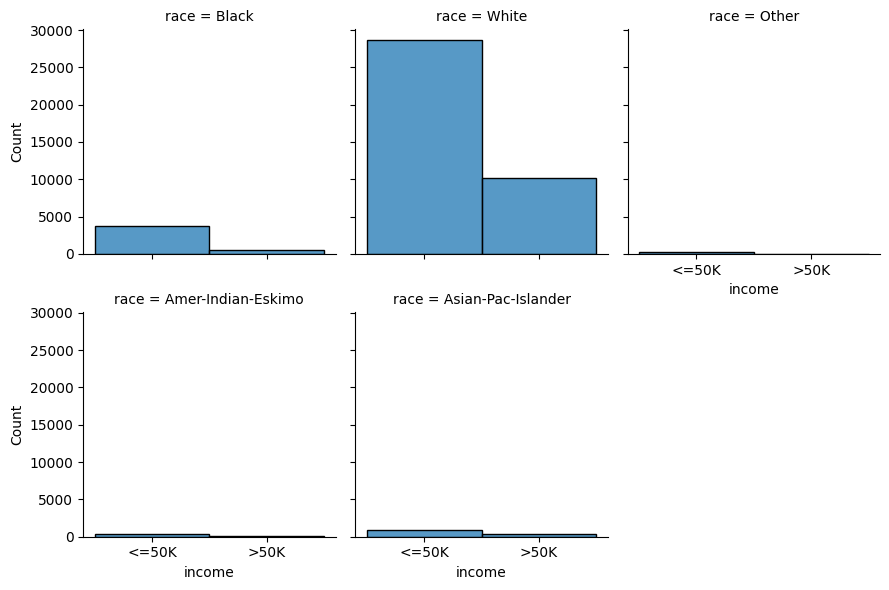

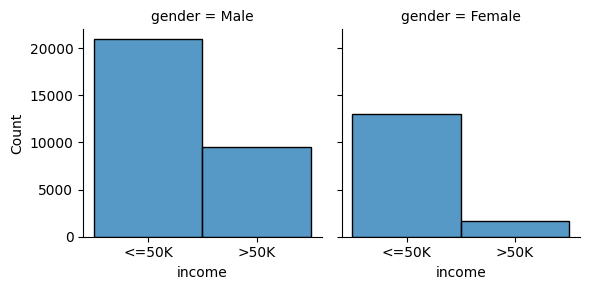

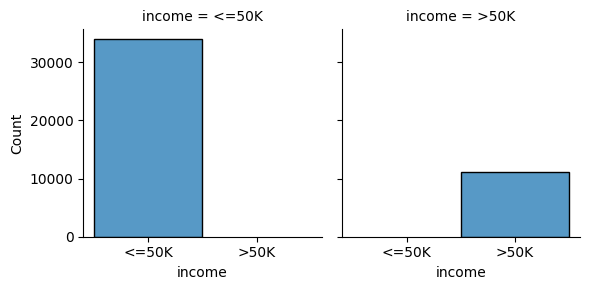

In [61]:
# Analyze Histograms for all categorical columns on income greater, less than and equal to $50K
# for each categorical column
for column in categorical_columns:

  # if the number of unique values in the column is more than 3
  if len(df[column].value_counts().index) > 3:

    # initiate sns.FacetGrid with column wrapping
    plot = sns.FacetGrid(df, col = column, col_wrap = 3)

    # draw histograms in the facetgrid
    plot.map(sns.histplot, 'income')

  # else (number of unique values in the column is 3 or less)
  else:

    # initiate sns.FacetGrid without column wrapping
    plot = sns.FacetGrid(df, col = column)

    # draw histograms in the facetgrid
    plot.map(sns.histplot, 'income')

  # show plot
  plt.show()

  # print blank lines for readability
  print('\n\n')


#Two visualizations for Stakeholder

From the following analysis we can determine individuals making more than 50K, the average age of that group is 44. Where those making less than 50K, the average age is 36.

In [62]:
# We will determine what average age group makes more or less than $50k
means = df.groupby('income')['age'].mean().sort_values(ascending=False)
means

income
>50K     44.006785
<=50K    36.758926
Name: age, dtype: float64

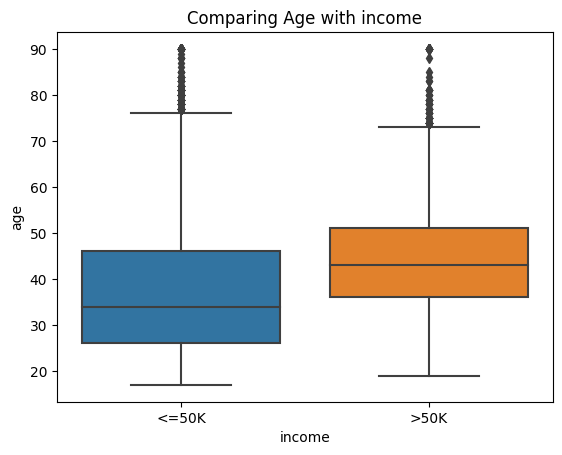

In [63]:
ax = sns.boxplot(data=df, x='income', y="age")
ax.set_title("Comparing Age with income");

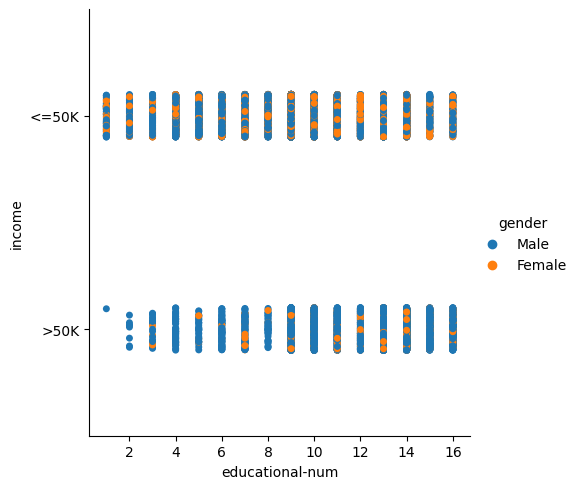

In [69]:
# Looking at this visual we can determine there are more females making more than $50K
Income = sns.catplot(x="educational-num", y="income",
                hue="gender",
                data=df)

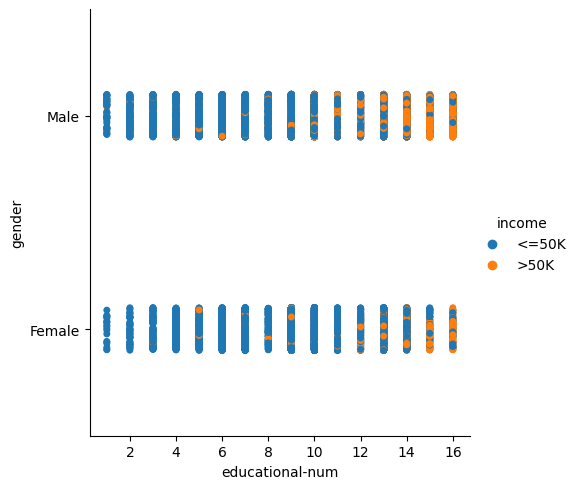

In [65]:
# Looking at this visual we can determine Men that have a longer term in education are making on average less than $50K
Income = sns.catplot(x="educational-num", y="gender",
                hue="income",
                data=df)

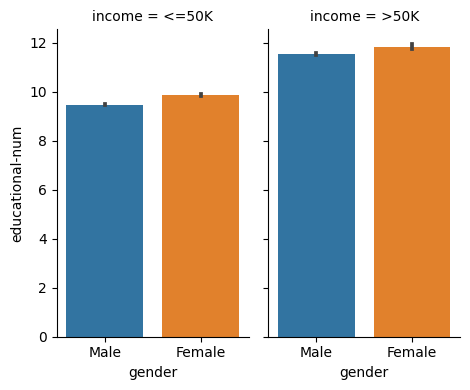

In [66]:
# Additional Analysis of variation in wage between woman and men
sns.catplot(
    data=df, x="gender", y="educational-num", col="income",
    kind="bar", height=4, aspect=.6,
);

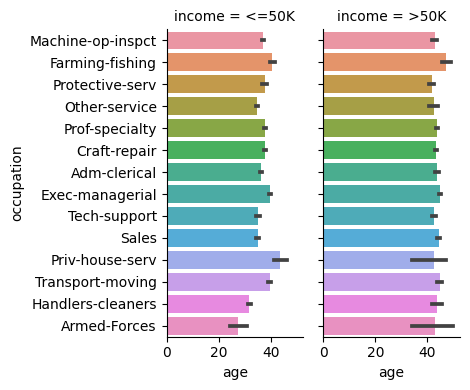

In [67]:
sns.catplot(
    data=df, x="age", y="occupation", col="income",
    kind="bar", height=4, aspect=.6,
);

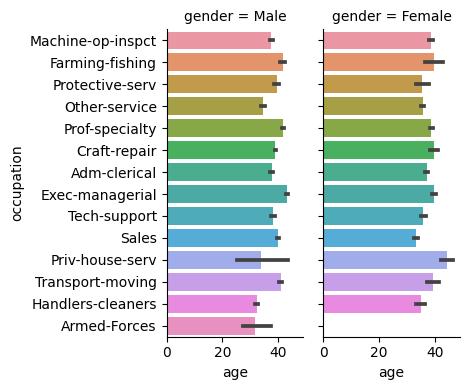

In [68]:
sns.catplot(
    data=df, x="age", y="occupation", col="gender",
    kind="bar", height=4, aspect=.6,
);